#2.5. Deep learning for text and sequences

Deep learning models have been used extensively for text and sequence processing tasks. Common text-related tasks that can be accomplished using deep-learning models include document classification, intent mining, information retrieval, query-answering, sentiment analysis, word prediction, spelling and grammar checking, etc. Recurrent Neural Networks (RNNs) and 1D convnets are mostly used to perform such tasks. 1D convnets are essentially a one-dimensional version of the 2-dimensional convolutional neural networks (used for image classification tasks).  


##2.5.1. Text data : encoding of words and characters using word embeddings
To process text data, we need some (efficient) way to represent them in a way that computers can understand. In NLP, words are often modeled by vectors. These are column vectors of N dimension (having a single column and N rows, where N is some big positive number, say 300). Vectors are generated (by a training process) such that similar words have their vectors aligning more closely to each other in N-dimensional vector space. For example, the vectors representing the words ‘good’ and ‘awesome’ align more closely, while the vector representing the word ‘bad’ aligns away from either of these vectors. Having encoded our vocabulary with such an approach, we can find the degree of similarity and differences between words by using the concept of distances (cosine distance, euclidean distance, etc) between these vectors. 


There are several approaches to construct the vector representation of all words in a vocabulary. One-hot-encoding is a simple model, where all the words are independent of each other and thus does not model ‘context’ well. On the other hand, Word2Vec captures context as well. Word2Vec can be obtained using two methods -- Skip Gram and Common Bag of Words (CBOW). Both of these methods employ Neural Networks. 


Encoding of characters is pretty much the same as that of words, except that here, we model/encode characters, not the words. Also, the one hot encoding vector’s length for characters is often much shorter than that for words as the number of characters is often much less than the total number of words in the language. For example, while there are as many as 13 million words in the English language, there are just 52 characters for alphabets (including both uppercase and lowercase) and a few special characters. However, there are memory efficient techniques to represent these vectors called sparse matrix. 



Word2Vec model for custom text corpus can be easily created using a popular natural language processing package in Python called **Gensim** (https://radimrehurek.com/gensim/).
You can get **Gensim** using **Pip**. After installing **Gensim** you can import *word2vec* class from it .

In [0]:
from gensim.models import word2vec


We then create a very small dummy corpus consisting 7 sentences with tokenized words.

In [0]:
texts = [
    ['computer',"good","human"],
    ['machine','good','human'],
    ['I','love','machine'],
    ['I','love','computer'],
    ['there','computer','in','office'],
    ['there','machine','in','office'],
    ["computer",'and',"machine",'replace','human'],
    ["computer","is","machine"]
    
]

We can now use our text corpus and train our word2vec model. We will make our word vector of dimension three. And as our corpus is very small we will use minimum count of 3.  

In [0]:
model = word2vec.Word2Vec(texts, size=3,min_count=1)


As our word2vec model has been trained, we can now find how words of our corpus has been represented as a vector. We will check the vector representation of word **"computer"**. 

In [0]:
print(model.wv['computer'])

[-0.03407839  0.10550132  0.0151996 ]


Word2vec is able to capture intrinsic rules and nature of language only through training data. The corpus we used is very very small and limited for word2vec model to learn all the intricacies of the language but it was able to learn some intricacies. We can visualize the nature of our word vectors using **tSNE** which stands for **t-distributed stochastic neighbor embedding**. tSNE is used to visualize high dimensional data in a two or three dimesion . The speciality of tSNE is that similar data are represented by near by points and dissimilar data by far distant point. 

We will use sklearn TSNE class to build our tSNE model to visualize our word vectors.


In [0]:
from sklearn.manifold import TSNE



We will now create a function called tsne_plot which will use TSNE class and matplotlib to make plots from our word2vec model.

In [0]:
import matplotlib.pyplot as plt

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=2, n_components=2, init='pca', n_iter=50000, random_state=10)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

Now when we feed our word2vec model in our tsne_plot function we get our 3D word vectors as points in a 2D plane. The closer are the words in the plot, more similar are they Since we have used very very small text corpus. The small corpus we have used are not enough to manifest this . But you can try it with larger corpus.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


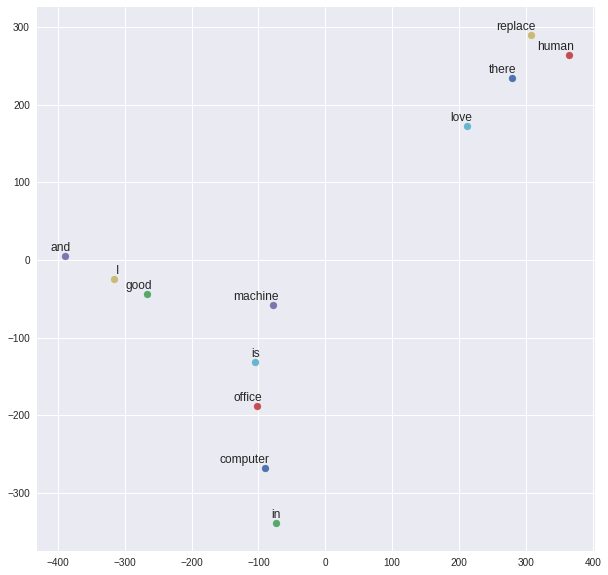

In [0]:
tsne_plot(model)


##2.5.2 Brief introduction to Google Colab

Google  made it its internal tool called Colab freely available to all few months back. Google Colab is built on top of jupyter notebook and provides all of the jupyter notebook features and many more. To learn details about jupyter noteboo you can visit this site [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/). You can access colab  notebook by following following steps:

1.   Go to your google drive
2.   Right click
3.   Click on more
4.   Click on colaboratory

The steps are also shown in the figure given below.



![alt text](https://cdn-images-1.medium.com/max/1600/1*7XLisHAnGGnflIYyqQja8Q.jpeg)

One of the most awesome feature that Google provides us through Colab is free GPU and TPU. GPU which stands for Graphis Processing Unit and TPU which stands for Tensor Processing Unit are very expensive hardwares which acclerates the training process of deep learning. You can check how use of CPU, GPU and TPU affects your training time. To select GPU or TPU you can follow these steps:
1. Open colab
2. Click **Edit ** at the top bar
3. Select** Notebook Settings**
4. Then you will find an option to choose either GPU or TPU as shown below.

![alt text](https://i2.wp.com/harshthaker.com/wp-content/uploads/2018/11/gpu-tpu.png?w=665&ssl=1)

In this chapter we are importing our dataset from our google drive to make a spam classifier. In order to do that we first need to provide colab required credential. This helps it to upload the data from google drive to its work space.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

When you run the code given above, you will be prompted to authentication as shown in the figure below. You should then follow the link and get a verification code and enter it . 

![alt text](https://cdn-images-1.medium.com/max/1000/1*2MGFc1JokfQzp68mMPgw7A.png)

Now we will create a function called **get_file_from_drive** to get our data from our google drive.

In [0]:
def get_file_from_drive(folder_id, file_name):
  file_list = drive.ListFile({'q': "'" + folder_id + "' in parents and trashed=false"}).GetList()
  for file in file_list:
    if file['title'] == file_name:
      return file['id']


Before we upload our data to colab work space, we need to specify the folder name where our data recides. You can get your folder id by going to your folder in your drive and checking the link as shown in the figure.

![alt text](https://i0.wp.com/alicekeeler.com/wp-content/uploads/2015/08/2015-08-15_14-56-55.png?ssl=1) 

In [0]:
drive_folder_id = "1O4uxHcQSUqaUJOGxhvnBNboJ-wsnYt8A"

We will then use a function called upload_data_system and upload our dataset file called **spam.csv**

In [0]:
def upload_data_system(filename):
  downloaded = drive.CreateFile({'id': get_file_from_drive(drive_folder_id, filename)})
  downloaded.GetContentFile(filename) 


upload_data_system(filename="spam.csv")

You can verify the existence of our data in our work space by using command **ls**

In [76]:
ls

adc.json  sample_data/  spam.csv


## 2.5.3 Data Preparation
Spam detection is a very important area of research in NLP as this. Emai spam filter are actively used in different products like gmail, hotmail etc. In this chapter we are going to use SMS data to detect spam. The data we are using in this chapter is a SMS Spam dataset collection which consist  messages that have been tagged as being ham (legitimate) or spam (illigimate). The data set ( spam.csv file that we are using) can be found here [SMS spam collection dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset).


### 2.5.3.1 Data Wrangling and Analysis
As we have  our data in our work space , we can read it as dataframe using pandas.

In [0]:
import pandas as pd
df = pd.read_csv("spam.csv",delimiter=',',encoding='latin-1')

We will check what our data looks like using** head** function.

In [78]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We can observe that our data has unwanted columns called **Unnamed: 2**, **Unnamed: 3 **and **Unnamed: 4**. We will drop these column . We have now two columns called** v1** and **v2**. v1 consists of class name and v2 consists text of corresponding class.

In [79]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We can use the describe function to get insight of our data. We can see that we have total of 5572 data in which 4825 are ham. We can also see that among 5572 data , only 5169 are unique. The most frequent sms text in our data set is "Sorry, I'll call later"

In [80]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


We can also inspect our data using visualization. Here we have used a bar diagram to get insight on counts of the classes.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of ham and spam messages')

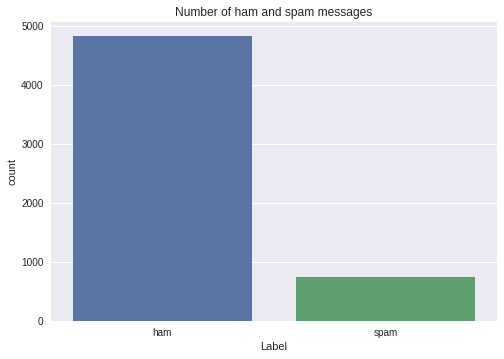

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

### 2.5.3.2 Preprocessing
Since our neural netorks can't process text directly we will convert it into a matrix. We will create a vocab of maximum 1000 words from our data . 

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)


We can check our vocab and its index using **word_index** attribute from our Tokenizer class. Here we will inspect first 5 words of our vocabularly. We can see that **"i"** has index** 1** , second word in **"to".** You can inspect all the words by just using *tok.word_index*

In [110]:
import itertools
dict(itertools.islice(tok.word_index.items(), 5))


{'a': 4, 'i': 1, 'the': 5, 'to': 2, 'you': 3}

Now we will use this vocabulary and their corresponding index to represent our SMS. We will create a matrix from all of our data

In [0]:
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

We also require to transform our labels to one hot encoding like we did earlier.

In [0]:
from sklearn.preprocessing import LabelEncoder

X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)


Our data are ready to be used for training . So we will split the dataset into train and test set. We will use 15 % of original data as our test set.

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


##2.5.4 Building Model
###2.5.4.1 Recurrent Neural Network (RNN)

Recurrent Neural Networks are neural networks with feedback loop. They have been proven to be very efficient at dealing with sequential data. Text is a kind of sequential data so for different NLP applications RNN and its different variation like LSTm and GRU have been intensively used. In this chapter we will build model using both LSTM  and GRU on the same dataset.


####2.5.4.1.1 LSTM Model
LSTM are RNN with capacity to  selectively remember or forget things. Keras provide LSTM layer which can be easily used to build our network. The first step of our model building will be to import all the tools required for us.


In [0]:
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

We will then create an instance of Sequential model

In [0]:
model = Sequential()


While building an architecture fro text classification our first layer is Embedding layer which learns embeddings for our data like we discuss above. Our embedding layer will take our vocab . We will use the input size of max_words as our input word index wont't be larger than max_words. The layer will output an encoding of 64 dimension. 

In [0]:
model.add(Embedding(max_words, 64))


Then our we will feed the output from the embedding layer to LSTM layer. The lstm layer will be followed by a dense layer. SInce we have only two classes , we use sigmoid activation fro our last layer.

In [0]:

model.add(LSTM(64, dropout=0.25, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

We have build our LSTm moel . Now we need to compile it like we had done earlier. 

In [0]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

We have built an LSTM model with 3 layers which has 97097 hidden units. Details of each layers can be inspected using mode.summary()

In [154]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 64)          64000     
_________________________________________________________________
lstm_10 (LSTM)               (None, 64)                33024     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


#### Callbacks
At this point , we will introduce a new concept Callback in keras that will be very helpful while training your network. Callback is a set of functions which is used in given stages of the training procedure to observe internal states and statistics of the model while training it. By using this statistics we can carry out several other functions.** Early stopping** is one of the function that can be explored using callback. Early stopping mean stoping the training process before the epochs are completed if certain criteria is met. Here we will monitor validation loss and use early stopping if the validation loss improvement is less than 0.0001 in comparision to previous validation loss.


In [155]:
from keras.callbacks import EarlyStopping

model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 11s 3ms/step - loss: 0.4375 - acc: 0.8564 - val_loss: 0.4144 - val_acc: 0.8565
Epoch 2/10
3788/3788 [==============================] - 9s 2ms/step - loss: 0.3910 - acc: 0.8688 - val_loss: 0.4138 - val_acc: 0.8565
Epoch 3/10
3788/3788 [==============================] - 9s 2ms/step - loss: 0.3879 - acc: 0.8688 - val_loss: 0.4129 - val_acc: 0.8565
Epoch 4/10
3788/3788 [==============================] - 9s 2ms/step - loss: 0.3807 - acc: 0.8688 - val_loss: 0.4219 - val_acc: 0.8565


We can now test our model using our test set. We find that our model is now 88% accurate

In [156]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
score = model.evaluate(test_sequences_matrix,Y_test)


836/836 [==============================] - 2s 2ms/step


In [157]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(score[0],score[1]))


Test set
  Loss: 0.406
  Accuracy: 0.864


###2.4.1.2 GRU Model
GRU is the RNN with update gate and reset gate which makes decision on what information should be passed to the output. You can read about in detail in chapter 1.5. In Keras, we can easily create new architecture using GRU layer. We just need to replace our LSTM layer with GRU layer.

In [167]:
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import GRU, Activation, Dense, Dropout, Input, Embedding


model = Sequential()
model.add(Embedding(max_words, 64))
model.add(GRU(64, dropout=0.25, recurrent_dropout=0.25))
model.add(Dense(1, activation='sigmoid'))

# model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, None, 64)          64000     
_________________________________________________________________
gru_6 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 88,833
Trainable params: 88,833
Non-trainable params: 0
_________________________________________________________________


 Now, we will train our GRU model with the same parameter we used to train our LSTM model

In [168]:
from keras.callbacks import EarlyStopping

model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 10s 3ms/step - loss: 0.4616 - acc: 0.8556 - val_loss: 0.4120 - val_acc: 0.8565
Epoch 2/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.3891 - acc: 0.8688 - val_loss: 0.4150 - val_acc: 0.8565


Tis seems like they both perform equally well for this data set. But this may not be the case for all data sets. For some data LSTM might perform well while in other GRU might beat LSTM.

In [171]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
score = model.evaluate(test_sequences_matrix,Y_test)


836/836 [==============================] - 1s 2ms/step


In [172]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(score[0],score[1]))


Test set
  Loss: 0.405
  Accuracy: 0.864
